In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
food = ctrl.Antecedent(np.arange(0, 11, 1), "food")
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")

tip = ctrl.Consequent(np.arange(0, 26, 1), "tip")

food.automf(3)
service.automf(3)

tip["low"] = fuzz.trimf(tip.universe,[0, 0, 13])
tip["midium"] = fuzz.trimf(tip.universe,[0, 13, 25])
tip["high"] = fuzz.trimf(tip.universe,[13, 25, 25])

C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


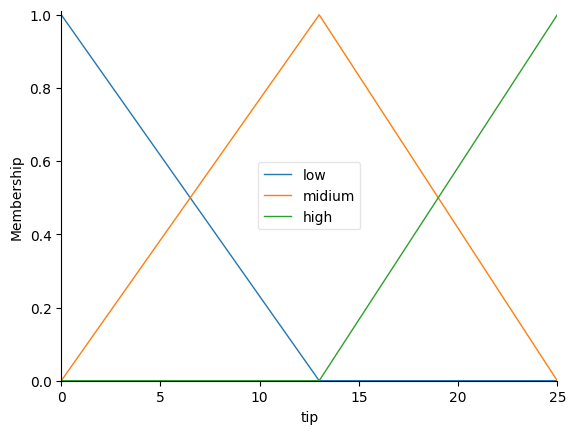

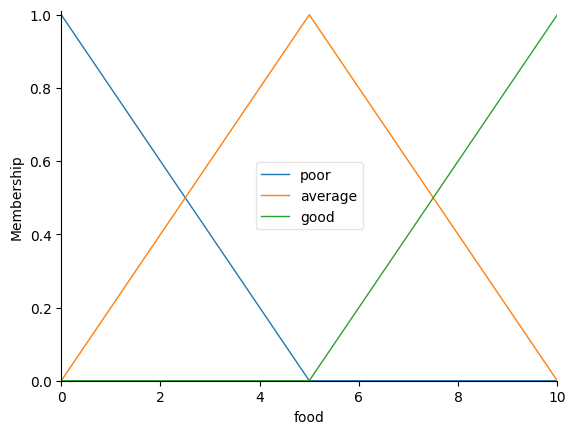

In [3]:
tip.view()
food.view()

In [4]:
rule1 = ctrl.Rule(service["poor"] | food["poor"], tip["low"])
rule2 = ctrl.Rule(service["average"], tip["midium"])
rule3 = ctrl.Rule(service["good"] | food["good"], tip["high"])

In [5]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [6]:
tipping.input["food"] = 10
tipping.input["service"] = 10

tipping.compute()

Gorjeta: 21.0


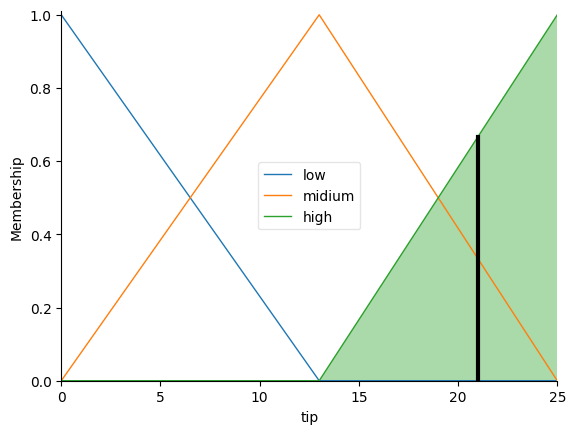

In [7]:
print(f'Gorjeta: {tipping.output["tip"]}')
tip.view(sim=tipping)